<a href="https://colab.research.google.com/github/cij1012/pytorch/blob/master/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_mydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup

In [2]:
test_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=168050&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 영화</title>
<link href="https://ssl.pstatic.net/static/m/movie/icons/naver_movie_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/common.css?20200515103320" rel="stylesheet" type="text/css">
<link href="/css/movie_tablet.css?20200515103320" rel="stylesheet" type="text/css"/>
<link href="/css/movie_end.css?20200515103320" rel="stylesheet" type="text/css"/>
<script src="/js/deploy/movie.all.js?20200515103320" type="text/javascript"></script>
</link></head>
<body>
<!-- content -->
<input id="movieCode" name="movieCode" type="hidden" value="168050"/>
<input id="onlyActualPointYn" name="onlyActualPointYn" type="hidden" value="N"/>
<input id="includeSpoilerYn" name="includeSpoilerYn" type="hidden" value="N"/>
<input id="order" name="order" type="hidden" value="sympathyScore"/>
<input id="page" name="page" type="hidden" value="1"/>
<div clas

In [0]:
score_result = html.find('div', {'class': 'score_result'})
lis = score_result.findAll('li')
lis[0]

In [33]:
review_text = lis[0].find('p').getText()
review_text.strip()

'원스 비긴어게인을 이을 영화이길 바랬는데 일단 가가의 연기 제스쳐는 어설프기 짝이없고 음색은 음악 영화에 안맞는다. 관객이 적은 이유가 뭐고 원스 비긴어게인처럼 양화 ost가 대박나지 않은 이유가 있는거임.'

In [31]:
score = lis[0].find('em').getText()
score

'1'

In [0]:
test_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=168050&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="
resp =  requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')

for i in range(1, 734):
  url = test_url + str(i)
  get_data(url)

In [36]:
import pandas as pd
df = pd.DataFrame(columns=['comment','score'])
df

,comment,score


In [42]:
page_num = 1
index = 0
while True:
  test_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=168050&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="+f'{page_num}'
  resp =  requests.get(test_url)
  html = BeautifulSoup(resp.content, 'html.parser')
  score_result = html.find('div',{'class' : 'score_result'})
  lis = score_result.findAll('li')
  for lis_ in lis:
    comment = lis_.find('p').getText().strip().replace("\n","").replace("\t","").replace("\r","")
    comment = comment.replace("관람객","")
    score = lis_.find('em').getText()
    df.loc[index] = [comment,score]
    if index%300==0:
      print(f'{index}의 리뷰를 탐색함')
      print(comment,score)
      print('------------'*5)
    index+=1

  page_num+=1
  if index>30000:break

0의 리뷰를 탐색함
앨리는 잭슨에게 사랑을, 잭슨은 앨리에게 세상을 선물했다 10
------------------------------------------------------------
300의 리뷰를 탐색함
아이고 엔딩이 왜이래 ㅠ 10
------------------------------------------------------------
600의 리뷰를 탐색함
여운이 깊게 남는 영화 브래들리 쿠퍼가 새롭게 보인다 10
------------------------------------------------------------
900의 리뷰를 탐색함
영화가 끝나도 곧바로 자리에서 일어날 수 없었다... 10
------------------------------------------------------------
1200의 리뷰를 탐색함
ost 앨범 마지막 트랙을 미리 듣고 영화 보러 가는 사람이 없기를 바라는 마음 10
------------------------------------------------------------
1500의 리뷰를 탐색함
와 진짜 스토리 호흡이 너무 늘어져서 숨 막히는줄... 4
------------------------------------------------------------
1800의 리뷰를 탐색함
연기 좋았고 노래도 좋았어요 .. 마지막이 좀 막막했지만 .. 좋은 영화 같내요 9
------------------------------------------------------------
2100의 리뷰를 탐색함
그저 영화일뿐? 이라고 하기엔 가슴깊이 전해지는 알수없는 감동이 전해져 오네요 ^^ 10
------------------------------------------------------------
2400의 리뷰를 탐색함
I'll always remember us this way.. 10
----------------------------------------------------------

In [41]:
df

,comment,score
0,"앨리는 잭슨에게 사랑을, 잭슨은 앨리에게 세상을 선물했다",10
1,"연기,연출,음악 하나도 빠지는게 없다.올해 본 최고의 음악영화.",10
2,인생에서 어떤 사람을 만나는지에 따라 인생이 바뀔 수 있다..,10
3,형 후진할때 충열된 눈 연출 진짜 절제하면서 잘담았어요 노래는말할것두없구요ㅜ 와 브레들리,10
4,비긴어게인 라라랜드 보다 더 재밌었다,10
...,...,...
15281,레이디가가의 창법이 영화를 망쳤다.,1
15282,아무것도 와닿는게 없었다,2
15283,진짜 평점알바의 위력을 느꼈습니다.근 10년간 본 영화중 최악이네요,1
15284,진짜 이러면 안된다. 라라랜드? 비긴어게인? 진짜 네이버 죄다 알바쓰나? 개연성도 ...,1


In [39]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 39.6MB/s 
     |████████████████████████████████| 92kB 6.1MB/s 
     |████████████████████████████████| 3.6MB 25.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-06-01 06:27:44--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist

In [0]:
from konlpy.tag import Mecab
import numpy as np
import matplotlib.pyplot as plt

stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','을','자','에','와','한','하다','아','나','어','에게','마치','따라']
tokenizer = Mecab()

In [53]:
print('전체 샘플의 수 : {}'.format(len(df)))

전체 샘플의 수 : 30004


In [54]:
temp = tokenizer.morphs(df.loc[2,'comment'])
print(temp)
temp = [word for word in temp if not word in stopwords]
print(temp)

['인생', '에서', '어떤', '사람', '을', '만나', '는지', '에', '따라', '인생', '이', '바뀔', '수', '있', '다', '.', '.']
['인생', '에서', '어떤', '사람', '만나', '는지', '인생', '바뀔', '수', '있', '다', '.', '.']


In [0]:
tokenized = []
for sentence in df['comment']:
  temp = []
  temp = tokenizer.morphs(sentence)
  temp = [word for word in temp if not word in stopwords]
  tokenized.append(temp)

In [56]:
print(tokenized[:10])

[['앨리', '잭슨', '사랑', ',', '잭슨', '앨리', '세상', '선물', '했', '다'], ['연기', ',', '연출', ',', '음악', '하나', '빠지', '게', '없', '다', '.', '올해', '본', '최고', '음악', '영화', '.'], ['인생', '에서', '어떤', '사람', '만나', '는지', '인생', '바뀔', '수', '있', '다', '.', '.'], ['형', '후진', '할', '때', '충열', '된', '눈', '연출', '진짜', '절제', '하', '면서', '담', '았', '어요', '노래', '말', '할', '것', '두', '없', '구요', 'ㅜ', '브레들리'], ['비긴', '어게인', '라라', '랜드', '보다', '더', '재밌', '었', '다'], ['무지', '션', '12', '개', '음', '자기', '방식', '대로', '만들', '것', '라', '했', '다', '.', '마지막', '5', '분', '서로', '마음', '합쳐', '부른', '노래', '모든', '장면', '돌아와', '내', '마음', '박혀서', '눈물', '안', '흘릴', '수', '없', '었', '다', '올해', '최고', '음악', '영화', '다'], ['녹음', '된', '게', '아니', '라', '죄다', '라이브', '였', '다니', '.', '..'], ['가슴', '먹먹', '하', '고', '눈물', '줄줄', '.', '.', '왜', '때문', '지', '?', '영화', '보', '고', '나와서', '바로', '내일', '날짜', '로', '다시', '예매', '했', '다', '.', '같이', '간', '바보', '멍청이', '같', '남편', '팝콘', '씹', '먹', '소리', '너무', '거슬려서', '영화', '초반', '1', '정도', '놓친', '것', '같', '혼자', '조용히', '다시', '보', '.', '..'], ['Al

In [57]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 7180


In [58]:
vocab_size = 500
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [0]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [0]:
encoded = []
for line in tokenized:
  temp = []
  for w in line:
    try:
      temp.append(word_to_index[w])
    except KeyError:
      temp.append(word_to_index['unk'])

  encoded.append(temp)

In [61]:
print(encoded[:10])

[[154, 155, 30, 112, 155, 154, 427, 0, 119, 13], [29, 112, 38, 112, 14, 190, 371, 15, 18, 13, 2, 167, 37, 115, 14, 3, 2], [123, 124, 0, 143, 0, 228, 123, 0, 130, 16, 13, 2, 2], [350, 0, 149, 165, 0, 206, 302, 38, 7, 0, 10, 181, 0, 116, 118, 111, 142, 149, 36, 150, 18, 0, 418, 396], [11, 12, 52, 55, 176, 141, 200, 26, 13], [0, 0, 0, 324, 133, 0, 0, 0, 258, 36, 208, 119, 13, 2, 128, 470, 218, 292, 171, 0, 0, 111, 191, 169, 0, 157, 171, 0, 122, 8, 0, 130, 18, 26, 13, 167, 115, 14, 3, 13], [0, 206, 15, 195, 208, 96, 444, 126, 428, 2, 113], [160, 201, 10, 4, 122, 495, 2, 2, 196, 60, 27, 5, 3, 109, 4, 0, 0, 0, 0, 139, 156, 0, 119, 13, 2, 306, 74, 0, 0, 138, 0, 0, 0, 0, 0, 114, 0, 3, 336, 325, 219, 0, 36, 138, 249, 0, 156, 109, 2, 113], [0, 0, 0, 0, 0, 3, 250, 155, 154, 0, 0, 112, 160, 250, 124, 487, 27, 27, 34, 40, 138, 13, 2, 0, 0, 286, 3], [144, 131, 419, 112, 146, 35, 29, 269, 112, 171, 337, 14, 2, 353, 190, 0, 36, 18, 26, 134, 184, 3, 2]]


리뷰의 최대 길이 : 69
리뷰의 최소 길이 : 0
리뷰의 평균 길이 : 23.792094


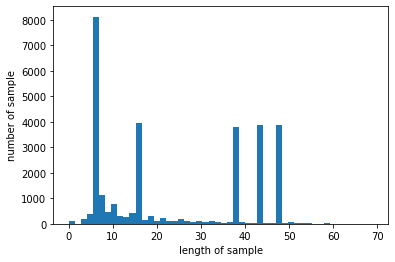

In [62]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [0]:
for line in encoded:
  if len(line) < max_len:
    line += [word_to_index['pad']] * (max_len - len(line))

In [64]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 69
리뷰의 최소 길이 : 69
리뷰의 평균 길이 : 69.000000


In [0]:
train_df = df[:20000]
test_df = df[20000:]

train_df.to_csv("train_data.csv", index = False)
test_df.to_csv("test_data.csv", index = False)

In [0]:
from torchtext import data

tokenizer = Mecab()

In [0]:
Text = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs,
                  lower=True,
                  batch_first=True,
                  fix_length=20)
Label = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

In [0]:
from torchtext.data import TabularDataset
train_data, test_data = TabularDataset.splits(
    path = '.', train='train_data.csv', test='test_data.csv', format='csv',
    fields=[('comment',Text),('score', Label)], skip_header=True)

In [113]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 20000
테스트 샘플의 개수 : 10004


In [114]:
print(vars(train_data[0]))

{'comment': ['앨리', '는', '잭슨', '에게', '사랑', '을', ',', '잭슨', '은', '앨리', '에게', '세상', '을', '선물', '했', '다'], 'score': '10'}


In [115]:
Text.build_vocab(train_data, min_freq=1)
print('단어 집합의 크기 : {}'.format(len(Text.vocab)))

단어 집합의 크기 : 7158


In [116]:
print(Text.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7f509dd39ae8>, {'<unk>': 0, '<pad>': 1, '.': 2, '영화': 3, '도': 4, '이': 5, '는': 6, '고': 7, '?': 8, '~': 9, '가': 10, '은': 11, '진짜': 12, '안': 13, '의': 14, '최악': 15, '에': 16, '하': 17, '다': 18, '나': 19, '비긴': 20, '어게인': 21, '을': 22, '음악': 23, '게': 24, '있': 25, '레이디가가': 26, '없': 27, '정말': 28, '되': 29, '중': 30, '임': 31, '이유': 32, '원스': 33, '~!': 34, '한': 35, '를': 36, '었': 37, '지': 38, '네요': 39, '연기': 40, '사랑': 41, '습니다': 42, '는데': 43, '적': 44, '않': 45, '가가': 46, '것': 47, '와': 48, '본': 49, '연출': 50, '기': 51, '거': 52, '면': 53, '알': 54, '줄': 55, 'ost': 56, '길': 57, '평점': 58, '점': 59, '많이': 60, '이런': 61, '내용': 62, '연기력': 63, '는다': 64, '라라': 65, '성': 66, '랜드': 67, '아직': 68, '10': 69, '뭐': 70, '별로': 71, '대박': 72, '때문': 73, '뻔한': 74, '처럼': 75, '년': 76, '개연': 77, '부족': 78, '죽': 79, '냐': 80, '집중': 81, '닿': 82, '바': 83, '뻔': 84, '쓰': 85, '간': 86, '보여': 87, '돈': 88, '된다': 89, '느꼈': 90, '맞': 91, '관객': 92, '역대': 93, '느라': 94, 'ㅋㅋㅋ': 95, '일단': 96, '음색': 97, '네이버

In [0]:
from torchtext.data import Iterator

In [0]:
batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size=batch_size)
test_loader = Iterator(dataset=test_data, batch_size=batch_size)

In [119]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 4000
테스트 데이터의 미니 배치 수 : 2001


In [120]:
batch = next(iter(train_loader))
print(batch.comment)
print(batch.score)

tensor([[  12,   58,  107,   14,  115,   22,   90,   42,    2,  108,   69,   76,
           86,   49,    3,   30,   15,    5,   39,    1],
        [ 885,   69,   59,  177,  927,  485,   11, 1135,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [ 104,    4,   48,   82,    6,   24,   27,   37,   18,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [ 161,  148,   14,  400,    5,   29,   37,   18,    2,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [ 123,   10,  316,  256,   16, 5256,   39,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1]])
tensor([ 1, 10,  2,  7,  9])


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

learning_rate = 0.05
training_epochs = 10

In [122]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [0]:
class Classfy(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(20,32),
        nn.ReLU(),
        nn.Linear(32,64),
        nn.ReLU(),
        nn.Linear(64,11))
  def forward(self, x):
    out = self.layer(x)
    return out

In [0]:
model = Classfy()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [125]:
total_batch = len(train_loader)
print(total_batch)

4000


In [131]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_loader: 
        X = X.to(torch.float)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 1.2773515
[Epoch:    2] cost = 1.27687311
[Epoch:    3] cost = 1.27506542
[Epoch:    4] cost = 1.27665496
[Epoch:    5] cost = 1.27645302
[Epoch:    6] cost = 1.27626443
[Epoch:    7] cost = 1.27685881
[Epoch:    8] cost = 1.27713668
[Epoch:    9] cost = 1.27651393
[Epoch:   10] cost = 1.27751899
